<a href="https://colab.research.google.com/github/shiranbel/Deep-Learning-Ex01-Maltese_VS_Havanese/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Definition

This project aims to classify images of two very similar dog breeds, Maltese and Havanese, using a deep learning model. The motivation is to explore fine-grained visual recognition, where class differences are subtle and challenging.

##Expected Challenges

The main difficulties include the strong visual similarity between the breeds, the small and limited dataset, and variations in lighting, pose, and image quality that can confuse the model.

In [1]:
!pip install -Uqq fastai kaggle
!pip install -Uqq fastai kaggle
import os, shutil
from fastai.vision.all import *
from pathlib import Path
from fastai.interpret import ClassificationInterpretation

os.environ['KAGGLE_USERNAME'] = "ofeksaar"
os.environ['KAGGLE_KEY'] = "KGAT_ddc20eb696e86387953a2e543eb4a76"

In [2]:
if not Path('143-different-dog-breeds-image-classifier.zip').exists():
    !kaggle datasets download -d rafsunahmad/143-different-dog-breeds-image-classifier
    !unzip -q 143-different-dog-breeds-image-classifier.zip

src_root, dest_root = Path('pet classifer image directory'), Path('Havanese_VS_Maltese')
dest_root.mkdir(exist_ok=True)

for breed in ['Maltese', 'Havanese']:
    (dest_root/breed).mkdir(exist_ok=True)
    src = src_root/breed if (src_root/breed).exists() else src_root/'dataset'/breed
    if src.exists():
        [shutil.copy(img, dest_root/breed/img.name) for img in get_image_files(src)[:100]]


In [3]:
fns = get_image_files(dest_root)
failed = verify_images(fns)
for fn in failed:
    fn.unlink()

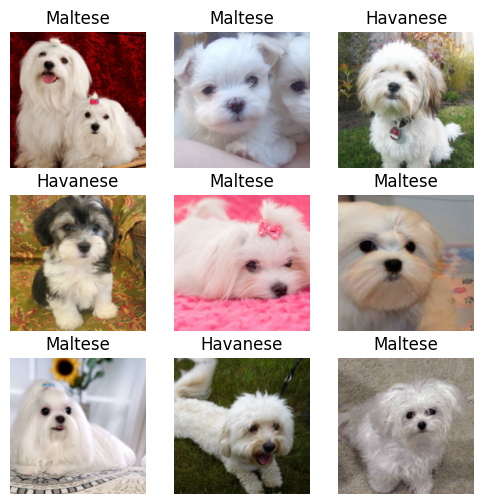

In [4]:
dogs_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms()
)

dls = dogs_block.dataloaders(dest_root, bs=32)

dls.show_batch(max_n=9, figsize=(6,6))


In [5]:
learn = vision_learner(dls, resnet34, metrics=[accuracy, error_rate])
learn.fine_tune(3)


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.156918,2.007630,0.656250,0.343750,00:43


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.542284,0.708325,0.843750,0.156250,00:57
1,0.345648,0.496473,0.843750,0.156250,00:55
2,0.256639,0.462153,0.875000,0.125000,00:49


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

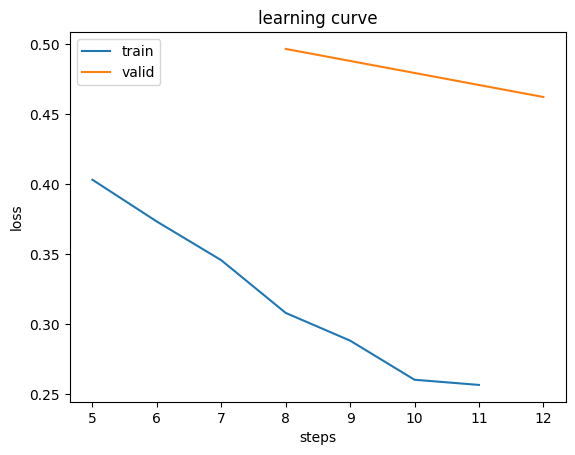

In [6]:
learn.recorder.plot_loss()

Validation loss: 0.4622, accuracy: 0.8750, error rate: 0.1250


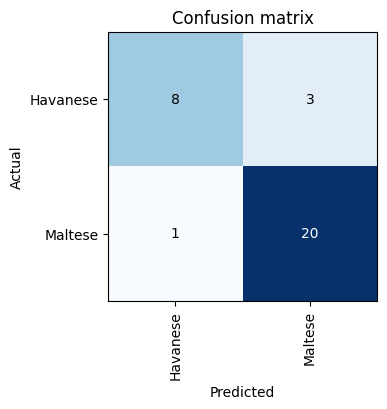

In [7]:
val_loss, acc, err = learn.validate()
print(f"Validation loss: {val_loss:.4f}, accuracy: {acc:.4f}, error rate: {err:.4f}")

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4))


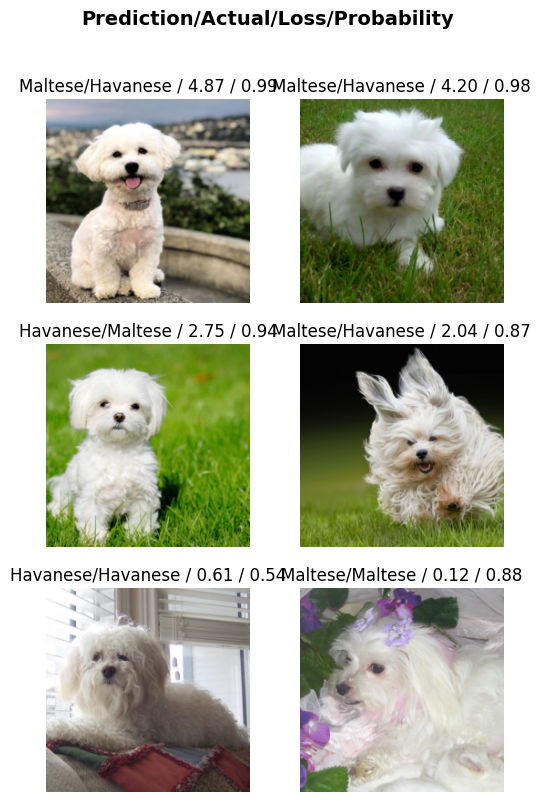

In [8]:
interp.plot_top_losses(6, nrows=3)


## Dataset Creation and Preparation

The images were collected from a public Kaggle dataset containing separate folders for each dog breed.
We filtered the dataset to include only the Maltese and Havanese classes and limited the number of images per class for consistency.
All images were cleaned by removing corrupt files and copied into a new structured directory.
The final dataset contains two folders: Maltese and Havanese each with 100 images ready for model training.



## Dataset Structure
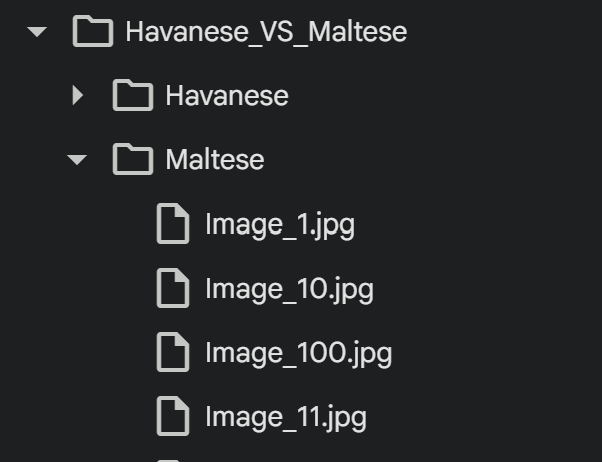


## Model Weaknesses
The model performs well overall, but struggles with visually ambiguous images and with distinguishing between the two breeds under challenging conditions. The main weaknesses include sensitivity to lighting, image sharpness and pose, high confidence in incorrect predictions, and confusion caused by the strong visual similarity between Maltese and Havanese. The model also generalizes less effectively on Havanese compared to Maltese, likely due to dataset imbalance and higher intra-class variability.